In [14]:
# Importing required libraries
import pandas as pd                                   
import numpy as np                                    
import keras
from keras.models import Sequential                   
from keras.layers import Dense, Activation            
from keras.callbacks import History 
from sklearn.metrics import confusion_matrix          
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelBinarizer    
from sklearn.model_selection import KFold
import seaborn as sns                                 
import matplotlib.pyplot as plt                       
%matplotlib inline

np.random.seed(1)  

In [15]:
# Load dataset from Keras
#KEEP DATA IN THE SAME DIRECTORY ***RELATIVE FILE PATH***
data = np.loadtxt("SPC-Datasets/SPC-Training.txt")
data2 = np.loadtxt("SPC-Datasets/SPC-Testing.txt")

In [16]:
# Shaping the Dataset for single run and Kfold run
(X_train, y_train), (X_test, y_test) =(data[:, 0:10], data[:, 10:17]), (data2[:, 0:10], data2[:, 10:17])

In [17]:
# Normalize x
X_train = X_train.astype(float) / np.amax(X_train)
X_test = X_test.astype(float) / np.amax(X_test)

# Flatten input: Changing dimension of input
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

# Transforming y using Label Binarizer from Scikit Learn
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

# Printing dimensions
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
    
# Splitting training data in training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)

Shape of X_train (2500, 10)
Shape of y_train (2500, 7)


In [18]:
i_nodes = X_train.shape[1]
h_nodes_1 = 512
h_nodes_2 = 256
o_nodes = y_train.shape[1]

In [19]:
model = Sequential()
history = History()
model.add(Dense(h_nodes_1, input_dim = i_nodes, kernel_initializer = 'normal', activation = 'relu'))    # Hidden Layer 1
model.add(Dense(h_nodes_2, kernel_initializer = 'normal', activation = 'relu'))                         # Hidden Layer 2
model.add(Dense(o_nodes, kernel_initializer = 'normal', activation = 'softmax'))                        # Output Layer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            # Compile Model

# Train Model
history = model.fit(X_train, y_train, epochs = 40, validation_data=(X_val, y_val))                     # Train Model

# Model Predictions
y_predict = model.predict_classes(X_test)

# Evaluate Model
Test_Loss, Test_Accuracy = model.evaluate(X_test, y_test)
Train_Loss, Train_Accuracy = model.evaluate(X_train, y_train)
val_Loss, val_Accuracy = model.evaluate(X_val, y_val)

Train on 2000 samples, validate on 500 samples
Epoch 1/40
2000/2000 [==============================] - 0s 136us/step - loss: 1.6823 - accuracy: 0.3900 - val_loss: 1.4920 - val_accuracy: 0.4100
Epoch 2/40
2000/2000 [==============================] - 0s 80us/step - loss: 1.1915 - accuracy: 0.5605 - val_loss: 0.8683 - val_accuracy: 0.7040
Epoch 3/40
2000/2000 [==============================] - 0s 77us/step - loss: 0.6653 - accuracy: 0.7695 - val_loss: 0.5753 - val_accuracy: 0.8040
Epoch 4/40
2000/2000 [==============================] - 0s 77us/step - loss: 0.4610 - accuracy: 0.8545 - val_loss: 0.4111 - val_accuracy: 0.8580
Epoch 5/40
2000/2000 [==============================] - 0s 76us/step - loss: 0.3559 - accuracy: 0.8935 - val_loss: 0.3486 - val_accuracy: 0.8640
Epoch 6/40
2000/2000 [==============================] - 0s 80us/step - loss: 0.3046 - accuracy: 0.9060 - val_loss: 0.3067 - val_accuracy: 0.8940
Epoch 7/40
2000/2000 [==============================] - 0s 82us/step - loss: 0.268

In [20]:
print("Training Loss is: ", round(Train_Loss*100,2),"%")
print("Training Accuracy is: ", round(Train_Accuracy*100,2),"%")
print("val Loss is: ", round(val_Loss*100,2),"%")
print("val Accuracy is: ", round(val_Accuracy*100,4),"%")

Training Loss is:  3.01 %
Training Accuracy is:  99.5 %
val Loss is:  20.42 %
val Accuracy is:  93.4 %


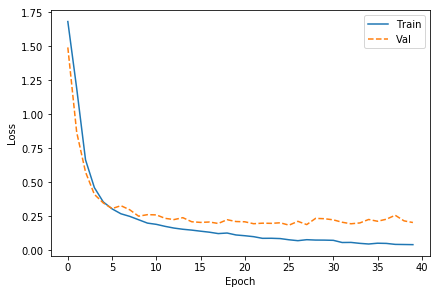

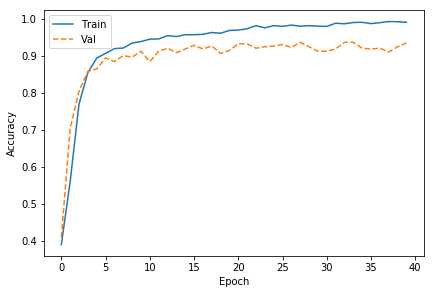

In [21]:
metrics =  ['loss', 'accuracy']
for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplots(nrows=1, ncols=1)
    plt.tight_layout()
    
    plt.plot(history.epoch,  history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],linestyle="--", label='Val')
    
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

In [22]:
# Getting Prediction Accuracies               
print("Test Accuracy is: ", (round((Test_Accuracy * 100), 2)),"%")
print("Test Loss is: ", round(Test_Loss*100,2),"%")

Test Accuracy is:  92.0 %
Test Loss is:  27.05 %


Text(0.5,51,'Predicted label')

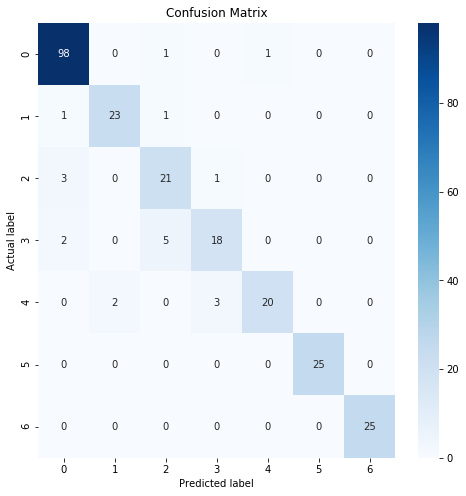

In [23]:
# Making a confustion Matrix
y_test_list = []
for rows in y_test:
    label = np.argmax(rows)
    y_test_list.append(label)
y_test = np.asarray(y_test_list);

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
count = 1;
kfold = KFold(3, True, 1)
for train, test in kfold.split(data):
    ([current_fold_train,current_fold_test]) = (data[train], data[test])
    print("Fold %d " % count)
    print(train)
    print('train: %s, test: %s' % (current_fold_train,current_fold_test))
    count +=1
    X_train, X_val, y_train, y_val = train_test_split(current_fold_train[:, 0:10], current_fold_train[:, 10:17], test_size = 0.2, random_state = 10)
    print("Shape of X_train", X_train.shape)
    print("Shape of y_train", y_train.shape)
    i_nodes = X_train.shape[1]
    h_nodes_1 = 512
    h_nodes_2 = 256
    o_nodes = y_train.shape[1]
    model = Sequential()
    history = History()
    model.add(Dense(h_nodes_1, input_dim = i_nodes, kernel_initializer = 'normal', activation = 'relu'))    # Hidden Layer 1
    model.add(Dense(h_nodes_2, kernel_initializer = 'normal', activation = 'relu'))                         # Hidden Layer 2
    model.add(Dense(o_nodes, kernel_initializer = 'normal', activation = 'softmax'))                        # Output Layer
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            # Compile Model

    # Train Model
    history = model.fit(X_train, y_train, epochs = 40, validation_data=(X_val, y_val))                     # Train Model
    # Model Predictions
    #y_predict = model.predict_classes(X_test)
    print("Shape of X_test", X_test.shape)
    print("Shape of y_test", y_test.shape)
    # Evaluate Model
    #y_test = y_test.reshape(78,1)
    #Test_Loss, Test_Accuracy = model.evaluate(X_test, y_test1)
    Train_Loss, Train_Accuracy = model.evaluate(X_train, y_train)
    val_Loss, val_Accuracy = model.evaluate(X_val, y_val)
    
    print("Training Loss and Training Accuracy",round(Train_Loss*100,2),"%", round(Train_Accuracy*100,2),"%")
    print("Validattion Loss and Validation Accuracy",round(val_Loss*100,2),"%", round(val_Accuracy*100,2),"%")
    print("Test Loss and Test Accuracy",round(Test_Loss*100,2),"%",round(Test_Accuracy*100,2),"%" )

Fold 1 
[   0    2    5 ... 2493 2494 2495]
train: [[-1.691 -2.426  1.44  ...  0.     0.     0.   ]
 [-0.278  0.169 -2.756 ...  0.     0.     0.   ]
 [ 1.217 -1.706  2.268 ...  0.     0.     0.   ]
 ...
 [-0.08   1.72  -0.067 ...  0.     0.     1.   ]
 [-0.728  0.085  0.526 ...  0.     0.     1.   ]
 [ 0.658 -0.899 -0.362 ...  0.     0.     1.   ]], test: [[ 1.337 -0.014 -1.134 ...  0.     0.     0.   ]
 [ 1.156  1.827  1.084 ...  0.     0.     0.   ]
 [-2.849 -2.715  0.909 ...  0.     0.     0.   ]
 ...
 [ 0.679  0.069  0.841 ...  0.     0.     1.   ]
 [ 0.948 -0.725  0.262 ...  0.     0.     1.   ]
 [-0.056 -1.581 -0.315 ...  0.     0.     1.   ]]
Shape of X_train (1332, 10)
Shape of y_train (1332, 7)
Train on 1332 samples, validate on 334 samples
Epoch 1/40
1332/1332 [==============================] - 0s 159us/step - loss: 1.5590 - accuracy: 0.4219 - val_loss: 1.3226 - val_accuracy: 0.5449
Epoch 2/40
1332/1332 [==============================] - 0s 79us/step - loss: 0.9626 - accuracy

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       100
           1       0.92      0.92      0.92        25
           2       0.75      0.84      0.79        25
           3       0.82      0.72      0.77        25
           4       0.95      0.80      0.87        25
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        25

    accuracy                           0.92       250
   macro avg       0.91      0.89      0.90       250
weighted avg       0.92      0.92      0.92       250

